# Sentiment Analysis with twitter data  
This project entails analyzing the sentiment associated with tweets on the current pandemic of covid-19.  
The data is obtained from twitter using a script I designed,you may have a look at it [here.](https://github.com/lyraxvincent/twitter-tweepy/blob/master/tweetscrap.py) (with a few modifications of the script of course)  
I modified the script to fit the needs:
- Tweets obtained are only from the country Kenya
- Tweets obtained are only in the English language
- No retweets obtained

I used the powerful text processing python module **TextBlob** for this task.

**Import necessary modules**

In [68]:
import pandas as pd
from textblob import TextBlob

Load the data

In [69]:
tweets = pd.read_csv('covidKE tweets.csv')

Viewing the data

In [70]:
tweets.head()

,tweet_id,text,created_at,likes
0,1242123434466979841,Everyday might not be good but there's always ...,2020-03-23 16:17:58,1
1,1242123396684697603,The next one week 😷\n\n #coronaviruskenya,2020-03-23 16:17:49,0
2,1242123373188124673,#coronaviruskenya #LockdownNow #UhuruKenyatta ...,2020-03-23 16:17:44,0
3,1242086219519012867,Internet never forget we will remind you that ...,2020-03-23 13:50:06,0
4,1242123367882330113,@ntsa_kenya @DCI_Kenya #coronaviruskenya If on...,2020-03-23 16:17:43,0


In [71]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   tweet_id    1190 non-null   int64 
 1   text        1190 non-null   object
 2   created_at  1190 non-null   object
 3   likes       1190 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 37.3+ KB


## Text Preprocessing

We remove any special characters, punctuations and stopwords from the tweets.

In [72]:
import string
from nltk.corpus import stopwords

Let's design a function for this task

In [73]:
def text_process(text):
    np = text.lower().split('#coronaviruskenya') # Remove the hashtag
    np = ''.join(np)
    np = [c for c in np if c not in string.punctuation]
    np = [c for c in np if c != '\n'] # Removing newline
    np = ''.join(np)
    np = np.split('https')[0] # Remove links
    np = [word for word in np.split() if word not in stopwords.words('english')] # Remove stopwords
    return ' '.join(np)

In [74]:
# Apply function to the text column
# We will overwrite the text column (after testing the function on a single tweet)

tweets['text'] = tweets['text'].apply(text_process)

In [75]:
tweets.head()

,tweet_id,text,created_at,likes
0,1242123434466979841,everyday might good theres always something go...,2020-03-23 16:17:58,1
1,1242123396684697603,next one week 😷,2020-03-23 16:17:49,0
2,1242123373188124673,lockdownnow uhurukenyatta imagine people copin...,2020-03-23 16:17:44,0
3,1242086219519012867,internet never forget remind resorted internet...,2020-03-23 13:50:06,0
4,1242123367882330113,ntsakenya dcikenya theyll provide food outdoor...,2020-03-23 16:17:43,0


## Sentiment Analysis

An example to show how we get the sentiment score/polarity for a single tweet

In [76]:
TextBlob(tweets.text[0]).sentiment

Sentiment(polarity=0.39999999999999997, subjectivity=0.6000000000000001)

In [77]:
TextBlob(tweets['text'][0]).sentiment.polarity

0.39999999999999997

Let's add a numerical column relating to text; text length 

In [78]:
tweets['text length'] = tweets['text'].apply(len)

In [79]:
tweets.head()

,tweet_id,text,created_at,likes,text length
0,1242123434466979841,everyday might good theres always something go...,2020-03-23 16:17:58,1,61
1,1242123396684697603,next one week 😷,2020-03-23 16:17:49,0,15
2,1242123373188124673,lockdownnow uhurukenyatta imagine people copin...,2020-03-23 16:17:44,0,72
3,1242086219519012867,internet never forget remind resorted internet...,2020-03-23 13:50:06,0,59
4,1242123367882330113,ntsakenya dcikenya theyll provide food outdoor...,2020-03-23 16:17:43,0,68


Now we design a function to apply to the text column to produce polarity for each tweet

In [80]:
def get_polarity(text):
    return TextBlob(text).sentiment.polarity

We add a new column to the dataframe based off of tweet polarity

In [81]:
tweets['polarity'] = tweets['text'].apply(get_polarity)

In [82]:
# Short form using lambda

#tweets['polarity'] = tweets['text'].apply(lambda text: TextBlob(text).sentiment.polarity)

In [83]:
tweets.sample(30)

,tweet_id,text,created_at,likes,text length,polarity
1063,1242073856329818112,clear dont know selfquarantine put people lock...,2020-03-23 13:00:58,0,63,0.100000
738,1242092769323122690,hoping president would say something soothing ...,2020-03-23 14:16:07,1,84,0.000000
207,1242067803902849025,lets subscribe like share live streaming covid...,2020-03-23 12:36:55,0,92,0.136364
467,1242102232671117314,646 people interacted 8 patients tested positi...,2020-03-23 14:53:44,2,77,0.227273
34,1242122277963038720,kenya 🇰🇪 fighting covid19 ignorance consider i...,2020-03-23 16:13:23,0,63,0.000000
215,1242114259712163847,sautisol nice plan sato sorted halafu naskia k...,2020-03-23 15:41:31,0,105,0.300000
961,1242081188942053377,home remember sanitize set targets deliverfor ...,2020-03-23 13:30:06,0,66,0.000000
555,1242098916847468548,gone days boasting coming usa europe get plane...,2020-03-23 14:40:33,0,62,0.000000
925,1242083517313560577,hi swvlkenya also implemented 60 rulelet know ...,2020-03-23 13:39:21,1,62,0.000000
781,1242091129866199040,people dont know read visa stamps priest leave...,2020-03-23 14:09:36,0,78,0.400000


Tweets with lowest polarity(-1)

In [84]:
tweets[tweets['polarity'] == -1]

,tweet_id,text,created_at,likes,text length,polarity
357,1242106974927573000,safaricomplc apana tunataka zile za 200 mbs do...,2020-03-23 15:12:34,2,95,-1.0
645,1242096205234085894,worst thing mulikacorona father mother brother...,2020-03-23 14:29:47,1,69,-1.0
1009,1242077721976545280,kplccustomercare worst time cut lights covid19...,2020-03-23 13:16:20,0,72,-1.0


Tweets with polarity 0

In [85]:
tweets[tweets['polarity'] == 0]

,tweet_id,text,created_at,likes,text length,polarity
1,1242123396684697603,next one week 😷,2020-03-23 16:17:49,0,15,0.0
2,1242123373188124673,lockdownnow uhurukenyatta imagine people copin...,2020-03-23 16:17:44,0,72,0.0
3,1242086219519012867,internet never forget remind resorted internet...,2020-03-23 13:50:06,0,59,0.0
4,1242123367882330113,ntsakenya dcikenya theyll provide food outdoor...,2020-03-23 16:17:43,0,68,0.0
5,1242123307903844353,like hassanalijoho said total shutdown,2020-03-23 16:17:28,0,38,0.0
...,...,...,...,...,...,...
1181,1242064302816874502,itsjakusa georgew27191819 inequality kenya dif...,2020-03-23 12:23:00,0,77,0.0
1182,1242064212895174662,1 death zimbabwe 3 corona virus cases 😭,2020-03-23 12:22:39,4,39,0.0
1183,1242064211800477697,three kakamega county officials came back trip...,2020-03-23 12:22:39,2,84,0.0
1184,1242064200840744960,lets graceful enough observe protocol stay mat...,2020-03-23 12:22:36,2,75,0.0


Tweets with highest polarity(1)

In [86]:
tweets[tweets['polarity'] == 1]

,tweet_id,text,created_at,likes,text length,polarity
237,1242112888082481153,lets best version selves crisis tupendane,2020-03-23 15:36:04,0,41,1.0
1055,1242074830842793985,probably best thing youll read today click link,2020-03-23 13:04:50,1,47,1.0
1066,1242073657297551370,create best shoe impression minuel minuelfalet...,2020-03-23 13:00:11,0,94,1.0


In [87]:
# It is evident that almost half of the obtained tweets have polarity 0

Tweets with negative polarity

In [88]:
tweets[tweets['polarity'] < 0]

,tweet_id,text,created_at,likes,text length,polarity
10,1242099789694750720,need help mean ukipata corona nkama uko na aid...,2020-03-23 14:44:01,1,52,-0.3125
11,1242099788893564929,money pandemic difficult chose dying hunger you…,2020-03-23 14:44:01,0,48,-0.5000
26,1242085595842838529,unga revolution weve waiting may unravel hang ...,2020-03-23 13:47:37,0,65,-0.3000
27,1242122438814715904,time want see kenyans billionaires coming help...,2020-03-23 16:14:01,0,83,-0.4000
40,1242122030373318657,wanted knowwhat logic behind gap bathroom door...,2020-03-23 16:12:24,0,77,-0.4000
...,...,...,...,...,...,...
1172,1242064801540591621,citizentvkenya sad god bless us god heals us,2020-03-23 12:24:59,3,44,-0.5000
1174,1242064688533438464,startimeskenya poor services ways pandemic wat...,2020-03-23 12:24:32,2,61,-0.4000
1186,1242064012797530112,oleitumbi time put mandatory😓😓i hate what’s ha...,2020-03-23 12:21:51,1,95,-0.8000
1188,1242063856727396352,mwendwafelix cisnyakundi robertalai levels inc...,2020-03-23 12:21:14,2,87,-0.3500


Tweets with positive polarity

In [89]:
tweets[tweets['polarity'] > 0]

,tweet_id,text,created_at,likes,text length,polarity
0,1242123434466979841,everyday might good theres always something go...,2020-03-23 16:17:58,1,61,0.400000
8,1242069774231887880,wish would much anticipated presidential addre...,2020-03-23 12:44:45,2,75,0.100000
13,1242116336739913728,taken since last friday buy gas seems differen...,2020-03-23 15:49:46,1,81,0.037500
16,1242122964608434181,togetherlets safe stop spread covid19 coronavi...,2020-03-23 16:16:06,1,50,0.500000
20,1242099340342067203,confirmed coronavirus cases kenya stands 16 on...,2020-03-23 14:42:14,5,86,0.400000
...,...,...,...,...,...,...
1168,1242064900278620160,😫😫😫here go againhow many retweets usitoe io ng...,2020-03-23 12:25:23,2,87,0.500000
1170,1242064847866662913,nahashon87 way uk taking risks win google ball...,2020-03-23 12:25:10,1,59,0.800000
1173,1242064784163573760,dating sugar momma online – worth,2020-03-23 12:24:55,2,33,0.300000
1176,1242064663577272321,advice young cubs looking sugar mummy online,2020-03-23 12:24:26,1,44,0.100000


## Some EDA

In [90]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('whitegrid')

**Distribution of polarity**

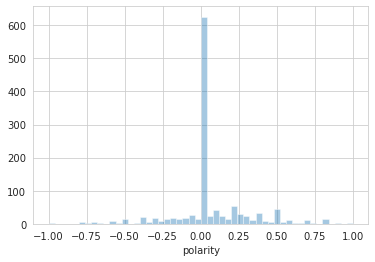

In [91]:
sns.distplot(tweets['polarity'], bins=50, kde=False)

**Distribution of text length**

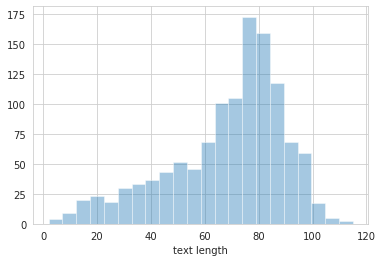

In [92]:
sns.distplot(tweets['text length'], kde=False)

A jointplot to show relation of text length and polarity

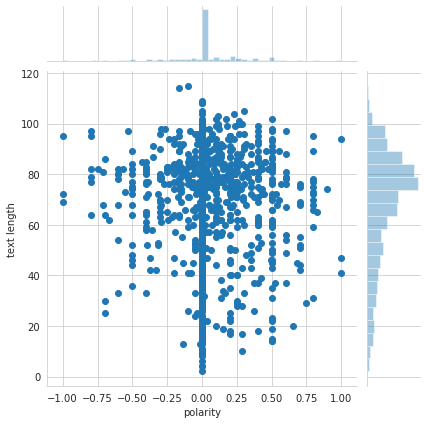

In [93]:
sns.jointplot(x='polarity', y='text length', data=tweets)

Most lengthy(range from 60 to 100) tweets range polarity from -0.25 and 0.25 from the jointplot above  
This is roughly around polarity 0, so we wouldn't be wrong to say that most lengthy tweets(in this range) have polarity of 0 or more appealing around polarity 0  
Let's get the mean length of tweets with polarity 0 to see that indeed this length lies in this range(60 to 100)

In [94]:
tweets[tweets['polarity']==0]['text length'].mean()

65.73710482529118

To further visualize this fact, let's create the same plot but of hexagonal and regressional nature

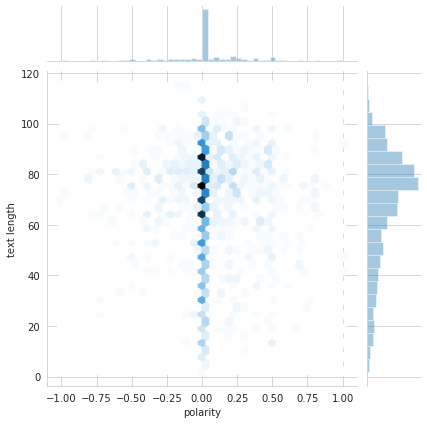

In [95]:
sns.jointplot(x='polarity', y='text length', data=tweets, kind='hex')

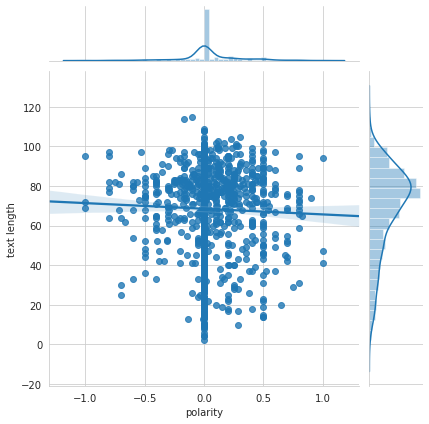

In [96]:
sns.jointplot(x='polarity', y='text length', data=tweets, kind='reg')

From this jointplot we can clearly see that the kde on the upper side of the plot shows some normal distribution around polarity 0  
This justifies our above argument that most lengthy(our range of 'lengthy') tweets have polarity of 0 (or around 0)

## Project conclusion

Clearly, we have seen that like half of the tweets have polarity of around 0.  
Does this mean that when a population is under such fear and anxiety of an epidemic, their messages express no negativity or positivity but are more neutral?